SCATTERPLOTS

Your first requirement is to create a series of scatter plots to showcase the following relationships:

Temperature (F) vs. Latitude
Humidity (%) vs. Latitude
Cloudiness (%) vs. Latitude
Wind Speed (mph) vs. Latitude


To generate a random float number between any two numbers, we can use random.uniform(start,stop)

In [1]:
#Dependencies
import requests 
import json
from pprint import pprint
from api_keys import weather_api_key
from citipy import citipy
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
#####TEST (PERTH CITY) to see json info, and define variables to extract for y-axis: Temperature(F), Latitude Humidity, Cloudiness, Windspeed, x-axis: Latitude####

#Request and get URL, and transform to JSON. 
#For units, use "imperial" as farenheit has been requested in project.
deg="\xb0" #degree sign
city="Sydney"
units="imperial"
url=f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
######Define variable "weather" and read the json file
weather=requests.get(url).json()
####Print the output of JSON formatted
#print(json.dumps(weather, indent=4, sort_keys=True))

####VARIABLES AND ITS VALUES FOR Y-AXIS###
#if set to imperial, units as follows
#Temp (F) 
print(weather["main"]["temp"], "Farenheit")
#Latitude Humidity
print(weather["main"]["humidity"], "% Humidity")
#Cloudiness (%)
print(weather["clouds"]["all"], "% Cloudiness")
#Windspeed (miles/hr)
print(weather["wind"]["speed"], "miles/hr")
# print("miles/hr")
####VARIABLES AND ITS VALUES FOR X-AXIS###
#latitude
print(weather["coord"]["lat"],deg,"latitude")
###OTHER VARIABLES####
#longitude
print(weather["coord"]["lon"],deg,"longitude")

82.69 Farenheit
51 % Humidity
0 % Cloudiness
21.85 miles/hr
-33.8679 ° latitude
151.2073 ° longitude


In [3]:
########JSON DATA #########
#base_url
base_url="http://api.openweathermap.org/data/2.5/weather?"

#######################

#Set up empty lists (for filling in in the for loop). Avoid using variables with same names as in API
 # Latitude, Longitude, Temperature(F), Latitude Humidity, Cloudiness, Windspeed
lat_list=[] #Latitude (°)
long_list=[] #Longitude (°)
city_list=[] #city name
temp_list=[] #Temperature(F)
lat_hum_list=[] #Latitude Humidity
cloud_list=[] #Cloudiness
winds_list=[] #windspeed

for x in range(2):
    #Random pick of latitude between -90 and 90 deg
    #Save latitudes into list "lat_list" 
    latitude=random.uniform(-90,90)
    lat_list.append(latitude)
    #Random pick of latitude between -180 and 180 deg
    #Save latitudes into list "lat_list" 
    longitude=random.uniform(-180,180)
    long_list.append(longitude)
    #Find the nearest city based on the random latitude and longitude variable
    city=citipy.nearest_city(latitude, longitude).city_name
    city_list.append(city)

    ####FOR THE CITY (in each loop), find variable values via JSON Data
    #Variable for query url. "imperial":farenheit, "metric":celcius, "":kelvin. 
    #Use "imperial" as farenheit has been requested in project.
    units="imperial"
    print(city)
    #query url
    query_url=f"{base_url}appid={weather_api_key}&units={units}&q={city}"
    ######Define variable "weather" and read the json file
    weather=requests.get(query_url).json()
    #Find temperature(F)
    temperature=weather["main"]["temp"]
    temp_list.append(temperature)
    #Find latitude humidity (%)
    lat_hum=weather["main"]["humidity"]
    lat_hum_list.append(lat_hum)
    #Cloudiness (%)
    cloud=weather["clouds"]["all"]
    cloud_list.append(cloud)
    #Windspeed (miles/hr)
    winds=weather["wind"]["speed"]
    winds_list.append(winds)


    # #Request and get URL, and transform to JSON. 
    # #For units, use "imperial" as farenheit has been requested in project.
    # deg="\xb0" #degree sign
    # city="London"
    # units="imperial"
    # url=f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
    # ######Define variable "weather" and read the json file
    # weather=requests.get(url).json()

print(lat_list)
print(long_list)
print(city_list)
print(temp_list)
print(lat_hum_list)
print(cloud_list)
print(winds_list)

#Create a dataframe from the lists created 
weather_dict={
    "City Name":city_list, 
    "Latitude":lat_list, 
    "Longitude":long_list,
    "Temperature": temp_list,
    "Latitude Humidity": lat_hum_list,
    "Cloudiness": cloud_list,
    "Wind Speed": winds_list
    }

weather_data = pd.DataFrame(weather_dict)
weather_data

kabansk
bredasdorp
[52.0120316053964, -75.27831414563954]
[106.48118870479595, 20.078108704642034]
['kabansk', 'bredasdorp']
[-2.2, 77]
[65, 65]
[8, 40]
[2.24, 11.5]


,City Name,Latitude,Longitude,Temperature,Latitude Humidity,Cloudiness,Wind Speed
0,kabansk,52.012032,106.481189,-2.2,65,8,2.24
1,bredasdorp,-75.278314,20.078109,77.0,65,40,11.50


Your second requirement is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

Northern Hemisphere - Temperature (F) vs. Latitude
Southern Hemisphere - Temperature (F) vs. Latitude
Northern Hemisphere - Humidity (%) vs. Latitude
Southern Hemisphere - Humidity (%) vs. Latitude
Northern Hemisphere - Cloudiness (%) vs. Latitude
Southern Hemisphere - Cloudiness (%) vs. Latitude
Northern Hemisphere - Wind Speed (mph) vs. Latitude
Southern Hemisphere - Wind Speed (mph) vs. Latitude

#Create dataframe for northern hemisphere cities using boolean, test latitude > 0 degrees
#Create dataframe for northern hemisphere cities using boolean, test latitude < 0 degrees

#Plot a scatter graph and do the linear regression (line of best fit and Pearson's r value)

Scatter plots of 500 cities

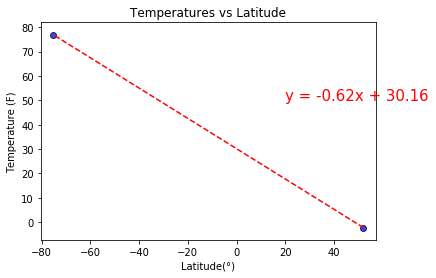

In [4]:
###Create scatter plot of Temperature(F) vs Latitude(°)

#Use dataframe from previous cell: weather_merged
weather_data

# Add the linear regression equation and line to plot
x_values = weather_data["Latitude"]
y_values = weather_data["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Make a scatter plot
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75);
# The y limits of our scatter plot 
plt.ylim(min(y_values)-5, max(y_values)+5)
# The x limits of our scatter plot 
plt.xlim(min(x_values)-5, max(x_values)+5)
#Plot linear regression model
plt.plot(x_values,regress_values,"--",color="red")
#Annotate the linear eqn y=mx+c
plt.annotate(line_eq,(20,50),fontsize=15,color="red")
#Label title, x-axis and y-axis
plt.title("Temperatures vs Latitude")
plt.xlabel("Latitude(°)")
plt.ylabel("Temperature (F)")
plt.show()

In [5]:
#Create dataframe from main dataframe "weather_data" and filter for only northern hemisphere city data (Latitude>0°)
north_df=weather_data[weather_data["Latitude"]>0]
north_df

,City Name,Latitude,Longitude,Temperature,Latitude Humidity,Cloudiness,Wind Speed
0,kabansk,52.012032,106.481189,-2.2,65,8,2.24


In [6]:
#Create dataframe from main dataframe "weather_data" and filter for only southern hemisphere city data (Latitude<0°)
south_df=weather_data[weather_data["Latitude"]<0]
south_df

,City Name,Latitude,Longitude,Temperature,Latitude Humidity,Cloudiness,Wind Speed
1,bredasdorp,-75.278314,20.078109,77.0,65,40,11.5
